<a href="https://colab.research.google.com/github/KevinTheRainmaker/ML_DL_Basics/blob/master/Basic_Skills/Scikt_learn_serving_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

from sklearn import datasets
import pickle
!pip install -q joblib
import joblib

In [ ]:
# Load the iris data
iris = datasets.load_iris()

# Create a matrix, X, of features and a vector, y.
X, y = iris.data, iris.target

In [ ]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

## K-means

In [ ]:
scaler = MinMaxScaler()

scaler.fit(X)

scaled = scaler.transform(X)
scaled[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

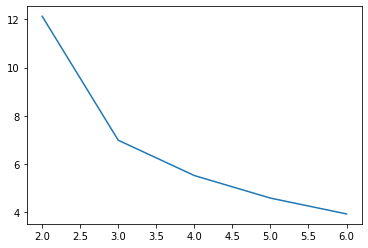

In [ ]:
inertia = []
for k in range(2, 7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(scaled)
  inertia.append(km.inertia_)

plt.plot(range(2,7), inertia)
plt.show()

In [ ]:
km = KMeans(n_clusters=3).fit(scaled)
km.cluster_centers_

array([[0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])

In [ ]:
predict = pd.DataFrame(km.predict(scaled))
predict.columns = ['Cluster']
predict['Cluster'].unique()

array([0, 1, 2], dtype=int32)

In [ ]:
scaled = pd.DataFrame(data=scaled, columns=['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width'])
scaled

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [ ]:
result = pd.concat([scaled, predict], axis=1).reset_index(drop=True)
result

,Sepal_length,Sepal_width,Petal_length,Petal_width,Cluster
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,1
148,0.527778,0.583333,0.745763,0.916667,1


In [ ]:
saved_model = pickle.dumps(km)

In [ ]:
km_from_pickle = pickle.loads(saved_model)
km_from_pickle.predict([[0.16666667, 0.41666667, 0.06779661, 0.04166667]])

array([0], dtype=int32)

In [ ]:
joblib.dump(km, 'km_clustering_ex.pkl')

['clustering_ex.pkl']

In [ ]:
km_from_joblib = joblib.load('km_clustering_ex.pkl') 
km_from_joblib.predict(scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

## K-proto

In [40]:
!pip install -q kmodes
from kmodes.kprototypes import KPrototypes

import plotly.express as px

In [41]:
iris = datasets.load_iris()
data = np.c_[iris['data'], iris['target']]
data[:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [47]:
kp = KPrototypes(n_clusters=3, init='Huang', n_init=1, verbose=True)
kp.fit(data, categorical=[4])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 40, ncost: 89.06095899868478
Run: 1, iteration: 2/100, moves: 7, ncost: 87.27835635280334
Run: 1, iteration: 3/100, moves: 1, ncost: 87.22715722315762
Run: 1, iteration: 4/100, moves: 0, ncost: 87.22715722315762


KPrototypes(gamma=0.9869215288799139, init='Huang', n_clusters=3, n_init=1,
            verbose=True)

In [48]:
kp.predict(data, categorical=[4])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint16)

In [49]:
np_arr = np.concatenate((iris["data"],iris["target"].reshape(-1,1), kp.labels_.reshape(-1,1)),axis=1)
df = pd.DataFrame(np_arr , columns = ["1","2","3","4","target","cluster"])
df[["cluster","target"]] = df[["cluster","target"]].astype(object)
px.scatter(df , x="1",y="2",color="target",symbol="cluster",width=700,height=700)

In [50]:
predict = pd.DataFrame(kp.predict(data, categorical=[4]))
predict.columns = ['Cluster']
predict.head(3)

,Cluster
0,2
1,2
2,2


In [51]:
joblib.dump(kp, 'kp_clustering_ex.pkl')

['kp_clustering_ex.pkl']

In [54]:
km_from_joblib = joblib.load('kp_clustering_ex.pkl') 
km_from_joblib.predict(data[:1], categorical=[4])

array([2], dtype=uint16)

## K-Modes

In [58]:
!pip install -q kmodes

In [70]:
from kmodes.kmodes import KModes

# random categorical data
data = np.random.choice(2, (100, 10))
data[:5]

array([[1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]])

In [79]:
kmo = KModes(n_clusters=4, init='Huang', n_init=5, verbose=0)

clusters = kmo.fit(data)

# Print the cluster centroids
print(kmo.cluster_centroids_)

[[0 0 1 1 0 1 1 0 0 0]
 [1 0 1 0 0 1 0 1 1 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 1 0 1 0 1 1 0 1]]


In [81]:
joblib.dump(kmo, 'kmo_clustering_ex.pkl')

['kmo_clustering_ex.pkl']

In [83]:
kmo_from_joblib = joblib.load('kmo_clustering_ex.pkl') 
kmo_from_joblib.predict(data[:1])

array([0], dtype=uint16)

In [97]:
gh_data = pd.read_csv('./궁합(응답)_예시.csv', encoding='cp949')
gh_data.tail()

,이름,학번 (ex 18학번),1. 내 취향의 가수는?,2. 무언가를 새로 시작하면,3. 내가 좋아하는 지스트 계절은,4. 요즘 내 기분은,5. 내 취향의 영화는,6. 지하철 문이 닫히려고 할 때 나는,7. 평소 나는,8. 학교 도서관에 가면 먼저 가는 곳은,9. 하나만 볼 수 있다면,10. 락락은
7,김유승,21,0,1,1,1,1,1,0,1,0,0
8,이지아,20,0,1,0,0,0,1,0,1,0,0
9,김철희,19,0,0,0,1,1,1,1,1,0,1
10,강채율,19,0,1,0,1,0,0,1,1,0,0
11,김승민,21,0,1,1,0,1,0,0,1,0,1


In [92]:
df = gh_data.iloc[:, 1:]
df.head()

,학번 (ex 18학번),1. 내 취향의 가수는?,2. 무언가를 새로 시작하면,3. 내가 좋아하는 지스트 계절은,4. 요즘 내 기분은,5. 내 취향의 영화는,6. 지하철 문이 닫히려고 할 때 나는,7. 평소 나는,8. 학교 도서관에 가면 먼저 가는 곳은,9. 하나만 볼 수 있다면,10. 락락은
0,18,0,0,1,0,1,1,0,0,1,0
1,19,1,0,1,1,1,0,1,0,0,1
2,17,0,0,0,0,1,1,1,1,0,0
3,20,1,0,0,0,0,0,0,1,0,1
4,19,1,0,1,1,1,1,0,0,1,1


In [96]:
print(type(df.values))

<class 'numpy.ndarray'>


In [98]:
data = df.values
data[:5]

array([[18,  0,  0,  1,  0,  1,  1,  0,  0,  1,  0],
       [19,  1,  0,  1,  1,  1,  0,  1,  0,  0,  1],
       [17,  0,  0,  0,  0,  1,  1,  1,  1,  0,  0],
       [20,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1],
       [19,  1,  0,  1,  1,  1,  1,  0,  0,  1,  1]])

In [101]:
kmo_g = KModes(n_clusters=11, init='Huang', n_init=5, verbose=0)

clusters = kmo_g.fit(data)

# Print the cluster centroids
print(kmo_g.cluster_centroids_)

[[19  0  0  0  1  1  1  1  1  0  1]
 [19  0  1  1  1  0  1  0  1  0  0]
 [20  0  0  1  1  0  1  1  1  0  1]
 [20  1  0  0  0  0  0  0  1  0  1]
 [19  1  0  1  1  1  1  0  0  1  1]
 [20  0  1  0  0  0  1  0  1  0  0]
 [17  0  0  0  0  1  1  1  1  0  0]
 [19  0  1  0  1  0  0  1  1  0  0]
 [21  0  1  1  0  1  0  0  1  0  1]
 [18  0  0  1  0  1  1  0  0  1  0]
 [19  1  0  1  1  1  0  1  0  0  1]]


In [102]:
joblib.dump(kmo_g, 'kmo_clustering_gunghab.pkl')

['kmo_clustering_gunghap.pkl']

In [103]:
kmo_from_joblib = joblib.load('kmo_clustering_gunghap.pkl') 
kmo_from_joblib.predict(data[:1])

array([9], dtype=uint16)